In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


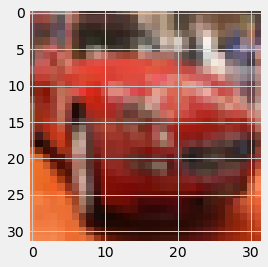

In [ ]:
index = 5
img = plt.imshow(x_train[index])


In [ ]:
classification = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("The Image class is",classification[y_train[index][0]])

The Image class is automobile


In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print("One Hot label ", y_train_one_hot[index])

One Hot label  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train = x_train/255
x_test = x_test/255


In [ ]:
#Neural Network Architecture
model = Sequential()
model.add(Conv2D(32, (5,5), activation ='relu', input_shape =(32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(125, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

In [ ]:
hist = model.fit(x_train,y_train_one_hot,
                 batch_size = 256,
                 epochs = 100,
                 validation_split = 0.2)

Epoch 1/100
157/157 [==============================] - 74s 463ms/step - loss: 2.5760 - accuracy: 0.1042 - val_loss: 2.3007 - val_accuracy: 0.1023
Epoch 2/100
157/157 [==============================] - 68s 436ms/step - loss: 2.2875 - accuracy: 0.1203 - val_loss: 2.2376 - val_accuracy: 0.1600
Epoch 3/100
157/157 [==============================] - 67s 430ms/step - loss: 2.2976 - accuracy: 0.1107 - val_loss: 2.3016 - val_accuracy: 0.0987
Epoch 4/100
157/157 [==============================] - 71s 452ms/step - loss: 2.3030 - accuracy: 0.1028 - val_loss: 2.3028 - val_accuracy: 0.1015
Epoch 5/100
157/157 [==============================] - 67s 424ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 6/100
157/157 [==============================] - 66s 420ms/step - loss: 2.3017 - accuracy: 0.0991 - val_loss: 2.3025 - val_accuracy: 0.1020
Epoch 7/100
157/157 [==============================] - 66s 420ms/step - loss: 2.3022 - accuracy: 0.0990 - val_loss: 2.2979 -

In [ ]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 17ms/step - loss: 1.4866 - accuracy: 0.6897


0.6897000074386597

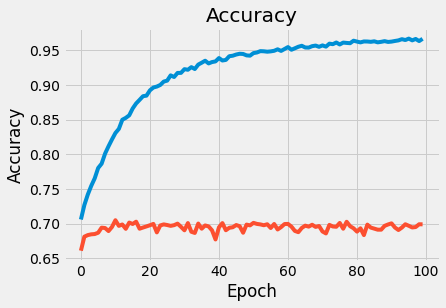

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

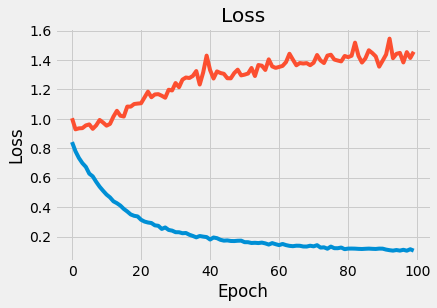

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ship1.jpg to ship1 (1).jpg


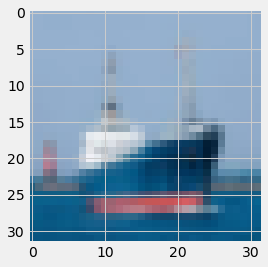

In [ ]:
meow = plt.imread('ship1.jpg')
from skimage.transform import resize
resize_meow = resize(meow, (32,32,3))
img = plt.imshow(resize_meow)

[8, 1, 0, 9, 2, 3, 5, 4, 6, 7]
ship : 100.0 %
automobile : 2.6192245529584046e-11 %
airplane : 2.6870192404654727e-12 %
truck : 8.368765755391905e-16 %
bird : 9.597123748302296e-20 %


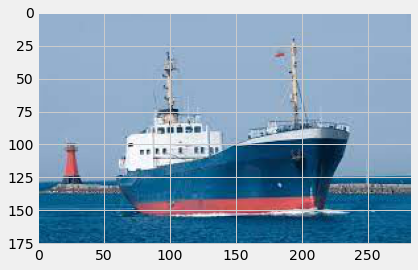

In [ ]:
prediction = model.predict(np.array([resize_meow]))
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)
img = plt.imshow(meow)

for i in range(5):
  print(classification[list_index[i]], ':', prediction[0][list_index[i]]*100, '%')